<a href="https://colab.research.google.com/github/Agum82/UAS-KecerdasanBuatan/blob/main/covid_19Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# IMPORT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

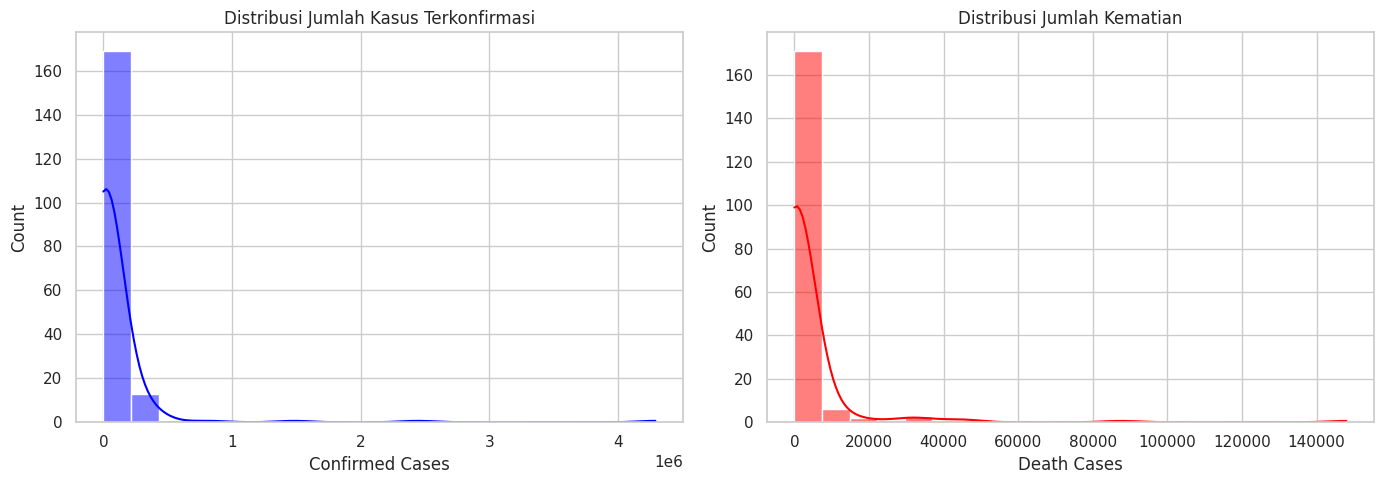

In [11]:
# Atur style
sns.set(style='whitegrid')

# 1. HISTOGRAM – Distribusi Kasus dan Kematian
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
sns.histplot(data ['Confirmed'], bins=20, color='blue', kde=True)
plt.title('Distribusi Jumlah Kasus Terkonfirmasi')
plt.xlabel('Confirmed Cases')

plt.subplot(1, 2, 2)
sns.histplot(data ['Deaths'], bins=20, color='red', kde=True)
plt.title('Distribusi Jumlah Kematian')
plt.xlabel('Death Cases')

plt.tight_layout()
plt.show()

<ipython-input-12-aecdda4ba311>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Country/Region', x='Confirmed', data=top10_cases, palette='Blues_r')


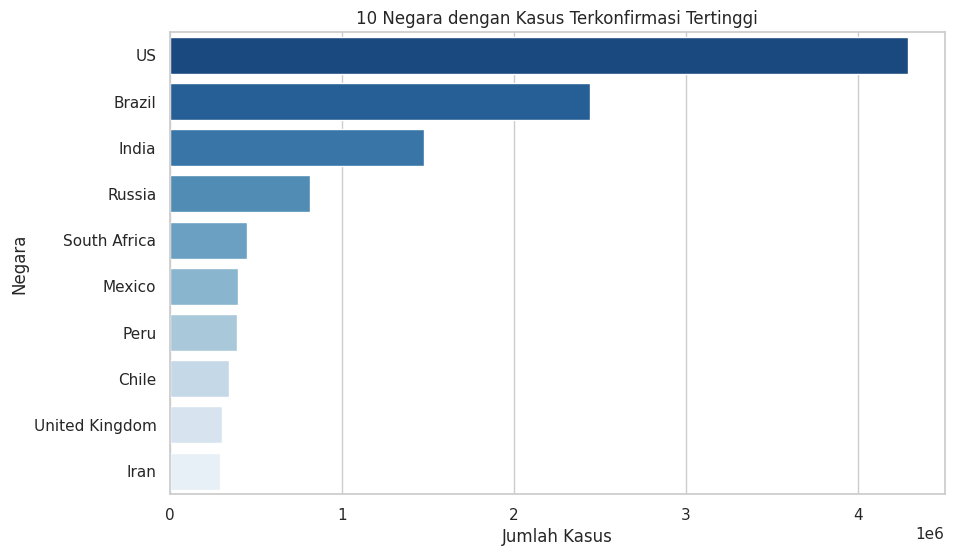

In [12]:
# BAR CHART – 10 Negara dengan Kasus Tertinggi
top10_cases = data.sort_values(by='Confirmed', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(y='Country/Region', x='Confirmed', data=top10_cases, palette='Blues_r')
plt.title('10 Negara dengan Kasus Terkonfirmasi Tertinggi')
plt.xlabel('Jumlah Kasus')
plt.ylabel('Negara')
plt.show()

In [10]:
data = pd.read_csv('/content/drive/MyDrive/DATASET/country_wise_latest.csv')

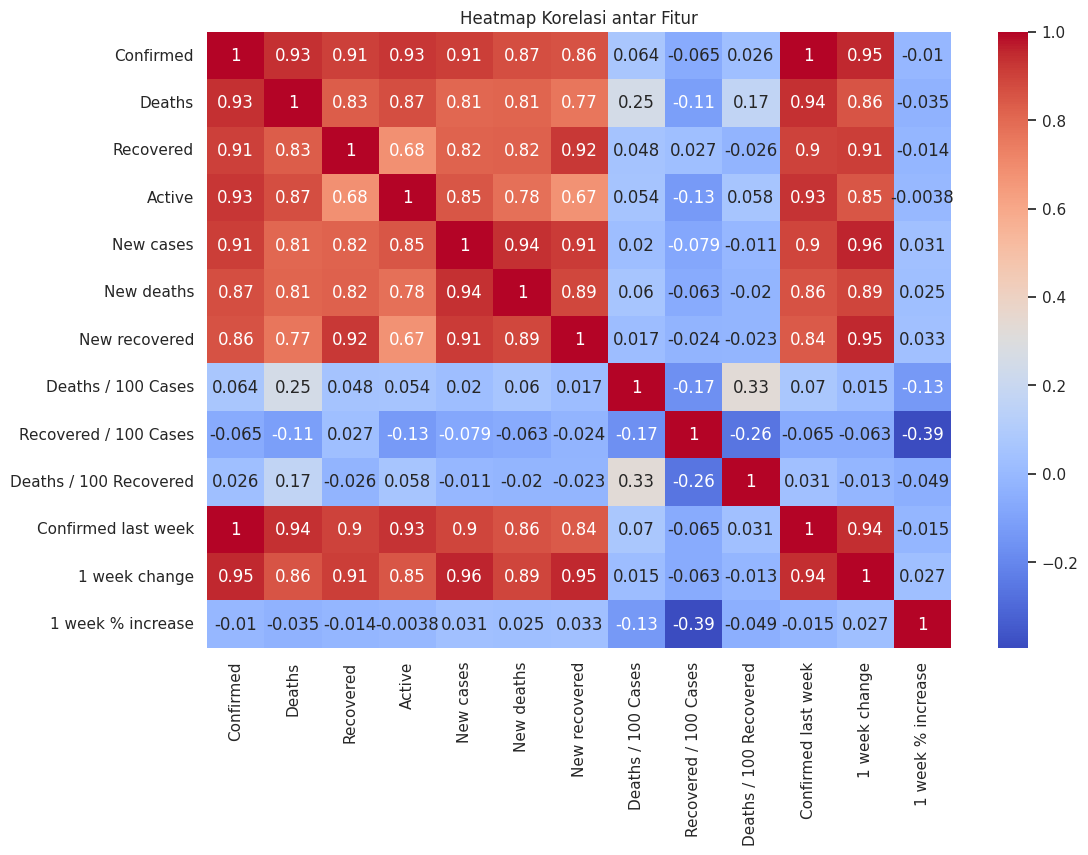

In [69]:
# Heatmap
plt.figure(figsize=(12, 8))
# Select only numerical columns for correlation
numerical_cols = df.select_dtypes(include=np.number).columns
corr_matrix = df[numerical_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Heatmap Korelasi antar Fitur")
plt.show()

In [13]:
# CREATE TARGET LABEL
data['Impact'] = data['Deaths'].apply(lambda x: 'High' if x > 10000 else 'Low')

<ipython-input-14-6cba26820c7e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Impact', data=data, palette='Set2')


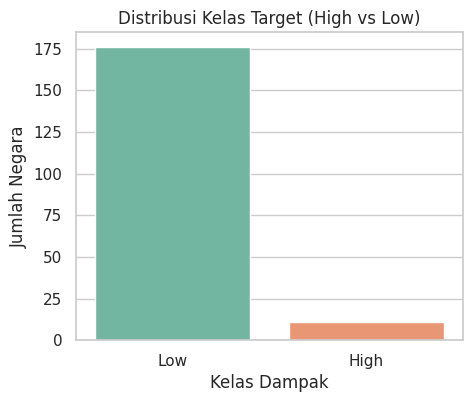

In [14]:
# Bar chart distribusi kelas
plt.figure(figsize=(5, 4))
sns.countplot(x='Impact', data=data, palette='Set2')
plt.title('Distribusi Kelas Target (High vs Low)')
plt.xlabel('Kelas Dampak')
plt.ylabel('Jumlah Negara')
plt.show()

In [15]:
# Persentase kelas
impact_counts = data['Impact'].value_counts(normalize=True) * 100
print("Persentase kelas:")
print(impact_counts)

Persentase kelas:
Impact
Low     94.117647
High     5.882353
Name: proportion, dtype: float64


In [16]:
# INSIGHT AWAL
# Negara dengan kematian tertinggi
top_deaths = data.sort_values(by='Deaths', ascending=False)[['Country/Region', 'Deaths']].head(5)
print("\nNegara dengan jumlah kematian tertinggi:")
print(top_deaths)

# Negara dengan rasio kesembuhan tinggi
high_recovery = data.sort_values(by='Recovered / 100 Cases', ascending=False)[['Country/Region', 'Recovered / 100 Cases']].head(5)
print("\nNegara dengan rasio kesembuhan tertinggi:")
print(high_recovery)


Negara dengan jumlah kematian tertinggi:
     Country/Region  Deaths
173              US  148011
23           Brazil   87618
177  United Kingdom   45844
111          Mexico   44022
85            Italy   35112

Negara dengan rasio kesembuhan tertinggi:
   Country/Region  Recovered / 100 Cases
75       Holy See                 100.00
69        Grenada                 100.00
49       Dominica                 100.00
48       Djibouti                  98.38
78        Iceland                  98.33


In [17]:
# PREPROCESSING
# Drop unnecessary columns and handle infinities/NaNs
df = data.drop(columns=['Country/Region', 'Impact']).replace([np.inf, -np.inf], np.nan).fillna(0)

# Scale the numerical features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(df.drop(columns=['WHO Region'])) # Exclude 'WHO Region' from scaling

# Encode the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['Impact'])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [18]:
# MODEL
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=50, batch_size=8, validation_split=0.2, verbose=1)


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.1519 - loss: 0.7398 - val_accuracy: 0.9333 - val_loss: 0.6662
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8764 - loss: 0.6458 - val_accuracy: 0.9667 - val_loss: 0.5817
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9584 - loss: 0.5694 - val_accuracy: 0.9667 - val_loss: 0.5157
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9596 - loss: 0.5009 - val_accuracy: 0.9667 - val_loss: 0.4583
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9264 - loss: 0.4546 - val_accuracy: 0.9667 - val_loss: 0.4038
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9513 - loss: 0.3958 - val_accuracy: 0.9667 - val_loss: 0.3509
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9753 - loss: 0.3189 - val_accuracy: 0.9667 - val_loss: 0.3000
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9276 - loss: 0.3169 - val_accuracy: 0.9667 - val_loss: 0.2593
Ep

In [19]:
# EVALUASI
loss, acc = model.evaluate(X_test, y_test)
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype('int32')

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9161 - loss: 0.1743
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
[[ 1  2]
 [ 1 34]]
              precision    recall  f1-score   support

        High       0.50      0.33      0.40         3
         Low       0.94      0.97      0.96        35

    accuracy                           0.92        38
   macro avg       0.72      0.65      0.68        38
weighted avg       0.91      0.92      0.91        38



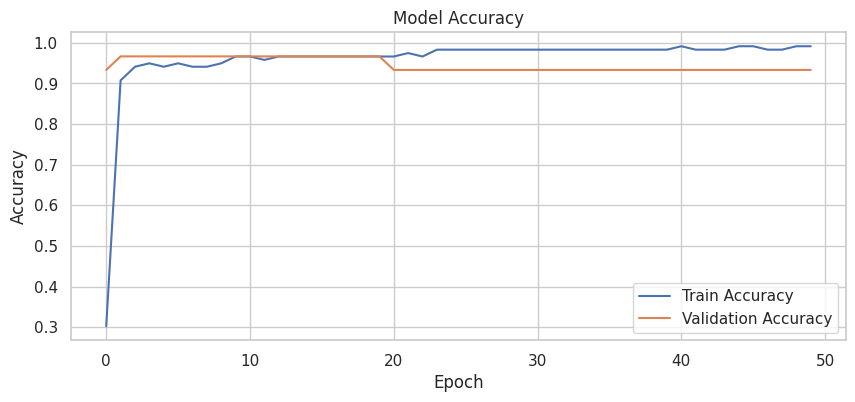

In [20]:
# STEP 9: VISUALISASI AKURASI
plt.figure(figsize=(10, 4))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

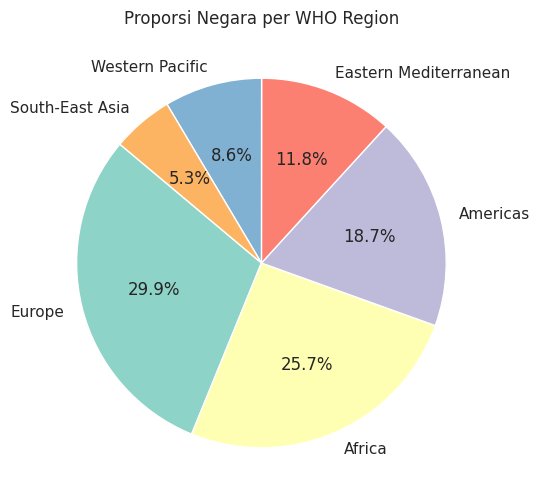

In [21]:
# 3. PIE CHART – Proporsi WHO Region
plt.figure(figsize=(6, 6))
df['WHO Region'].value_counts().plot.pie(autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set3'))
plt.title('Proporsi Negara per WHO Region')
plt.ylabel('')
plt.show()